In [13]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize


In [14]:
def bindea(z,n):
    a=z+n
    p1=  15.76*(a)
    p2=  -17.81*(a**(2./3.))
    p3=  -0.711 * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(any(z)%2==0 and n%2==0):
        p5=34.*(a**(-3./4.))
        
    elif(any(z)%2==1 and any(n)%2==1):
        p5=-34.*(a**(-3./4.))
        
    else: 
        p5=0
        
    be=p1+p2+p3+p4+p5
    return be

In [3]:
def binde(z,n):
    a=z+n
    p1=  15.76*(a)
    p2=  -17.81*(a**(2./3.))
    p3=  -0.711 * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(z%2==0 and n%2==0):
        p5=34.*(a**(-3./4.))
        
    elif(z%2==1 and n%2==1):
        p5=-34.*(a**(-3./4.))
        
    else: 
        p5=0
        
    be=p1+p2+p3+p4+p5
    return be

In [4]:
zdrip=[]
ndep=[]
zdripndep={}  #zdripndep is now a Dictionary where the key is the n value
initialz=1
finalz=200

nrange= range(1, 178)

for n in nrange:
    #print('n=', n)
    for z in range(initialz, finalz):
        
        befirst=binde(z,n)       
        besecond=binde(z+1,n)    
        separationE=besecond-befirst 
        
        #print('    z=', z)
        if separationE<=0 and besecond>=0 and befirst>=0:
            
            ndep.append(n)
            zdrip.append(z)
            zdripndep[n]=z
            finalz=z+20
            
            if z>=10:
                initialz=z-10
            else:
                initialz=1   
            break
       
           
lastz=zdrip[-1]
    
#zdripndep  

        
   


In [5]:
ndrip=[]
zdep=[]
ndripzdep={} #ndripzdep is now a dictionary where the key is the z value
initialn=1
finaln=200

test={}


zrange=range(1, lastz+1)


for z in zrange:
    #print('z=', z)
    for n in range(initialn, finaln):
        
        befirst=binde(z,n)     
        besecond=binde(z,n+1)  
        separationE=besecond-befirst 
        #print('    z=', z)
        if separationE<0 and besecond>0 and befirst>0:
            zdep.append(z)
            ndrip.append(n)
            
            ndripzdep[z]=n
            finaln=n+20
            if z>=10:
                initialn=n-10
            else:
                initialn=1  
            break
    #print('\n')

#print(zdep, '\n')
#print(ndrip, '\n')


#print(np.shape(zdep))
#print(np.shape(ndrip))


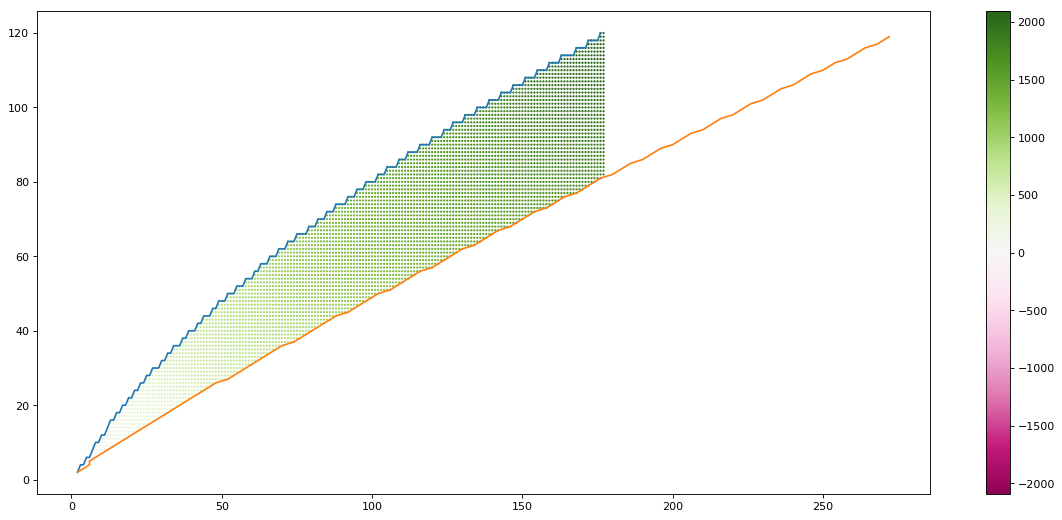

In [6]:
#print(zdripndep[177])
#print(ndripzdep[lastz])

#Dictionaries 
#zdripndep[n values that go from 1 to 177]= z values that go from 1 to 120
#ndripzdep[z values that go from 1 to lastz]=n values that go from 1 to 276
be={} #key values are z,n values

#arrays
zdripline = np.transpose(np.stack((zdrip,ndep )))
ndripline = np.transpose(np.stack((zdep,ndrip )))



z_all=[]
n_all=[]
be_all=[]



for z in range(2,121):
    for n in range(2, 178):
        #print('z=', z, 'zdripndep[n]=', zdripndep[n] )
        #print('n=', n, 'ndripzdep[z]=', zdripndep[z], '\n' )
        
        
        if z<=zdripndep[n] and n<=ndripzdep[z]:
            #print(z, n)
            z_all.append(z)
            n_all.append(n)
            be_all.append(binde(z,n))
            be[z,n]=binde(z,n)

            

ext = np.int(np.ceil(max(-np.min(be_all),np.max(be_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(n_all,z_all,c=be_all,cmap='PiYG',vmin=-ext,vmax=ext,s=1)
plt.plot(np.transpose(zdripline)[1][0:-1], np.transpose(zdripline)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripline)[1][0:-1], np.transpose(ndripline)[0][0:-1],label='python Neutron drip line')
plt.colorbar(sc)
plt.show()
            
            
            
#plt.plot(z_all,n_all, 'x', markersize=1, )


In [7]:
y_the=[]
N_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3) #Number of neutrons
Z_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4) #Number of protons
X_exp = np.transpose(np.stack((Z_exp,N_exp)))
A_exp = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5)
y_the=bindea(Z_exp,N_exp)
the_exp_diff=y_the-y_exp

    
# Instantiate model 
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_exp, the_exp_diff, test_size =0.25, random_state=42 )
    
#fitting the rf to the training values
rf.fit(X_train, y_train);
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9940908876434186
0.9626611727885521


In [8]:
diffd={}
diffl=[]

z_all=[]
n_all=[]
for z in range(2,121):
    for n in range(2, 178):
        #print('z=', z, 'zdripndep[n]=', zdripndep[n] )
        #print('n=', n, 'ndripzdep[z]=', zdripndep[z], '\n' )
        
        
        if z<=zdripndep[n] and n<=ndripzdep[z]:
            print(z, n)
            z_all.append(np.array([z]))
            n_all.append(np.array([n]))
            diffl.append(list(rf.predict( [ [z,n  ] ])))
            diffd[z,n]=  list(rf.predict( [ [z,n  ] ] ))
            

            
print(np.shape(n_all))
print(np.shape(z_all))
print(np.shape(diffl))

0.9940908876434186
0.9626611727885521
2 2
3 3
3 4
4 3
4 4
4 5
4 6
5 5
5 6
6 5
6 6
6 7
6 8
7 7
7 8
7 9
7 10
8 7
8 8
8 9
8 10
8 11
8 12
9 8
9 9
9 10
9 11
9 12
9 13
9 14
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
11 10
11 11
11 12
11 13
11 14
11 15
11 16
11 17
11 18
12 10
12 11
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
13 12
13 13
13 14
13 15
13 16
13 17
13 18
13 19
13 20
13 21
13 22
14 12
14 13
14 14
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
15 13
15 14
15 15
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 26
16 13
16 14
16 15
16 16
16 17
16 18
16 19
16 20
16 21
16 22
16 23
16 24
16 25
16 26
16 27
16 28
17 15
17 16
17 17
17 18
17 19
17 20
17 21
17 22
17 23
17 24
17 25
17 26
17 27
17 28
17 29
17 30
18 15
18 16
18 17
18 18
18 19
18 20
18 21
18 22
18 23
18 24
18 25
18 26
18 27
18 28
18 29
18 30
18 31
18 32
19 17
19 18
19 19
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
19 33
19 34
20 17
20 18
20 19
20 20
2

52 99
52 100
52 101
52 102
52 103
52 104
52 105
52 106
52 107
52 108
53 58
53 59
53 60
53 61
53 62
53 63
53 64
53 65
53 66
53 67
53 68
53 69
53 70
53 71
53 72
53 73
53 74
53 75
53 76
53 77
53 78
53 79
53 80
53 81
53 82
53 83
53 84
53 85
53 86
53 87
53 88
53 89
53 90
53 91
53 92
53 93
53 94
53 95
53 96
53 97
53 98
53 99
53 100
53 101
53 102
53 103
53 104
53 105
53 106
53 107
53 108
53 109
53 110
54 58
54 59
54 60
54 61
54 62
54 63
54 64
54 65
54 66
54 67
54 68
54 69
54 70
54 71
54 72
54 73
54 74
54 75
54 76
54 77
54 78
54 79
54 80
54 81
54 82
54 83
54 84
54 85
54 86
54 87
54 88
54 89
54 90
54 91
54 92
54 93
54 94
54 95
54 96
54 97
54 98
54 99
54 100
54 101
54 102
54 103
54 104
54 105
54 106
54 107
54 108
54 109
54 110
54 111
54 112
55 61
55 62
55 63
55 64
55 65
55 66
55 67
55 68
55 69
55 70
55 71
55 72
55 73
55 74
55 75
55 76
55 77
55 78
55 79
55 80
55 81
55 82
55 83
55 84
55 85
55 86
55 87
55 88
55 89
55 90
55 91
55 92
55 93
55 94
55 95
55 96
55 97
55 98
55 99
55 100
55 101
55 102
55 1

73 91
73 92
73 93
73 94
73 95
73 96
73 97
73 98
73 99
73 100
73 101
73 102
73 103
73 104
73 105
73 106
73 107
73 108
73 109
73 110
73 111
73 112
73 113
73 114
73 115
73 116
73 117
73 118
73 119
73 120
73 121
73 122
73 123
73 124
73 125
73 126
73 127
73 128
73 129
73 130
73 131
73 132
73 133
73 134
73 135
73 136
73 137
73 138
73 139
73 140
73 141
73 142
73 143
73 144
73 145
73 146
73 147
73 148
73 149
73 150
73 151
73 152
73 153
73 154
73 155
73 156
73 157
73 158
74 88
74 89
74 90
74 91
74 92
74 93
74 94
74 95
74 96
74 97
74 98
74 99
74 100
74 101
74 102
74 103
74 104
74 105
74 106
74 107
74 108
74 109
74 110
74 111
74 112
74 113
74 114
74 115
74 116
74 117
74 118
74 119
74 120
74 121
74 122
74 123
74 124
74 125
74 126
74 127
74 128
74 129
74 130
74 131
74 132
74 133
74 134
74 135
74 136
74 137
74 138
74 139
74 140
74 141
74 142
74 143
74 144
74 145
74 146
74 147
74 148
74 149
74 150
74 151
74 152
74 153
74 154
74 155
74 156
74 157
74 158
74 159
74 160
75 92
75 93
75 94
75 95
75 96
75 9

89 140
89 141
89 142
89 143
89 144
89 145
89 146
89 147
89 148
89 149
89 150
89 151
89 152
89 153
89 154
89 155
89 156
89 157
89 158
89 159
89 160
89 161
89 162
89 163
89 164
89 165
89 166
89 167
89 168
89 169
89 170
89 171
89 172
89 173
89 174
89 175
89 176
89 177
90 116
90 117
90 118
90 119
90 120
90 121
90 122
90 123
90 124
90 125
90 126
90 127
90 128
90 129
90 130
90 131
90 132
90 133
90 134
90 135
90 136
90 137
90 138
90 139
90 140
90 141
90 142
90 143
90 144
90 145
90 146
90 147
90 148
90 149
90 150
90 151
90 152
90 153
90 154
90 155
90 156
90 157
90 158
90 159
90 160
90 161
90 162
90 163
90 164
90 165
90 166
90 167
90 168
90 169
90 170
90 171
90 172
90 173
90 174
90 175
90 176
90 177
91 120
91 121
91 122
91 123
91 124
91 125
91 126
91 127
91 128
91 129
91 130
91 131
91 132
91 133
91 134
91 135
91 136
91 137
91 138
91 139
91 140
91 141
91 142
91 143
91 144
91 145
91 146
91 147
91 148
91 149
91 150
91 151
91 152
91 153
91 154
91 155
91 156
91 157
91 158
91 159
91 160
91 161
91 162

In [11]:

            


#print('\n')
#print(np.array(z_all))
#print('\n')
#print(list(diffl))


ext = np.int(np.ceil(max(-np.min(diffl),np.max(diffl))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(n_all,z_all,c=diffl,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
#plt.plot(N_exp,Z_exp,c=the_exp_diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)

plt.plot(np.transpose(zdripline)[1][0:-1], np.transpose(zdripline)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripline)[1][0:-1], np.transpose(ndripline)[0][0:-1],label='python Neutron drip line')
#plt.plot(z_all, n_all,label='python proton drip line')
#plt.plot(z_all, n_all,label='python Neutron drip line')
plt.colorbar(sc)
plt.show()


NameError: name 'diffl' is not defined

In [11]:
#zdripndep = np.transpose(np.stack((zdrip,ndep )))
#ndripzdep = np.transpose(np.stack((zdep,ndrip )))

#print(zdripndep)
#plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
#plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
#plt.plot(range(0,120),range(0,120),label='diagonal axis')
#plt.ylabel('Proton  #')
#plt.xlabel('Neutron #')
#plt.legend()
#plt.show()


#print('ndep: the proton drip that is iterating through n, ')
#print('it should be regular') 
#print(np.transpose(zdripndep)[1], '\n')

#print('zdrip: the proton drip that is dependent on n, ')
#print('it should be irregular')
#print(np.transpose(zdripndep)[0], '\n\n\n')

#print('zdep: the neutron drip is iterating through z')
#print('it should be regular')
#print(np.transpose(ndripzdep)[0], '\n')

#print('ndrip: the Neoutron Drip that is dependent on z')
#print('it should be irregular')
#print(np.transpose(ndripzdep)[1], '\n')


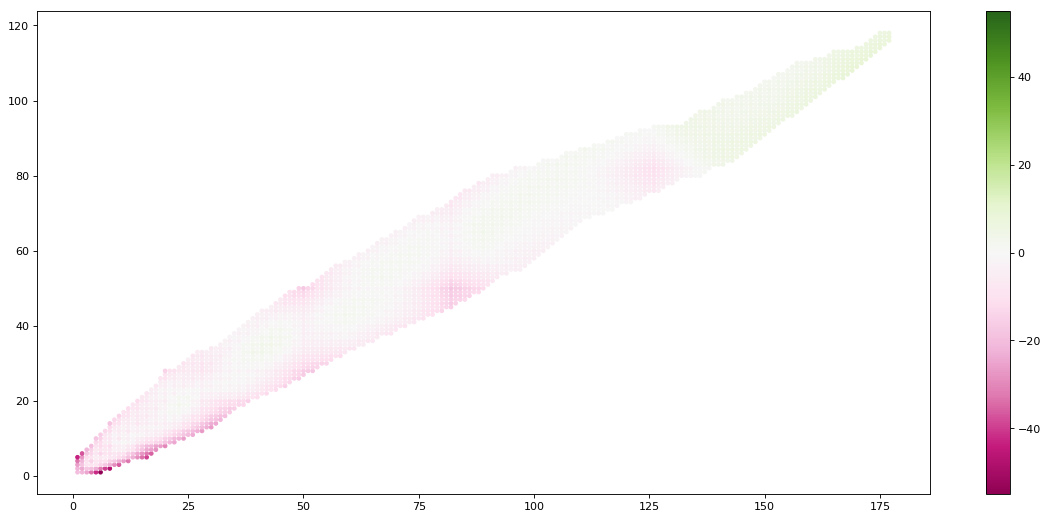

In [20]:
y_the=[]
N_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3) #Number of neutrons
Z_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4) #Number of protons
X_exp = np.transpose(np.stack((Z_exp,N_exp)))
A_exp = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5)
y_the=bindea(Z_exp,N_exp)
the_exp_diff=y_the-y_exp


ext = np.int(np.ceil(max(-np.min(the_exp_diff),np.max(the_exp_diff))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=the_exp_diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
#plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
#plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
plt.colorbar(sc)
plt.show()

# Using ML

In [13]:
zdrip_ml=[]
ndep_ml=[]
zdripndep_ml={}  #zdripndep is now a Dictionary where the key is the n value
initialz_ml=1
finalz_ml=200

nrange= range(1, 178)

for n in nrange:
    print('n=', n)
    for z in range(initialz_ml, finalz_ml):
        
        befirst=binde(z,n) + rf.predict(   np.array(  [ [z,n  ] ]  )   )      
        besecond=binde(z+1,n) + rf.predict(   np.array(  [ [z+1,n  ] ]  )   )    
        separationE=besecond-befirst 
        
        #print('    z=', z)
        if separationE<=0 and besecond>=0 and befirst>=0:
            
            ndep_ml.append(n)
            zdrip_ml.append(z)
            zdripndep_ml[n]=z
            finalz_ml=z+20
            
            if z>=10:
                initialz_ml=z-10
            else:
                initialz_ml=1   
            break
       
           
lastz_ml=zdrip_ml[-1]
    
#zdripndep  

n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20
n= 21
n= 22
n= 23
n= 24
n= 25
n= 26
n= 27
n= 28
n= 29
n= 30
n= 31
n= 32
n= 33
n= 34
n= 35
n= 36
n= 37
n= 38
n= 39
n= 40
n= 41
n= 42
n= 43
n= 44
n= 45
n= 46
n= 47
n= 48
n= 49
n= 50
n= 51
n= 52
n= 53
n= 54
n= 55
n= 56
n= 57
n= 58
n= 59
n= 60
n= 61
n= 62
n= 63
n= 64
n= 65
n= 66
n= 67
n= 68
n= 69
n= 70
n= 71
n= 72
n= 73
n= 74
n= 75
n= 76
n= 77
n= 78
n= 79
n= 80
n= 81
n= 82
n= 83
n= 84
n= 85
n= 86
n= 87
n= 88
n= 89
n= 90
n= 91
n= 92
n= 93
n= 94
n= 95
n= 96
n= 97
n= 98
n= 99
n= 100
n= 101
n= 102
n= 103
n= 104
n= 105
n= 106
n= 107
n= 108
n= 109
n= 110
n= 111
n= 112
n= 113
n= 114
n= 115
n= 116
n= 117
n= 118
n= 119
n= 120
n= 121
n= 122
n= 123
n= 124
n= 125
n= 126
n= 127
n= 128
n= 129
n= 130
n= 131
n= 132
n= 133
n= 134
n= 135
n= 136
n= 137
n= 138
n= 139
n= 140
n= 141
n= 142
n= 143
n= 144
n= 145
n= 146
n= 147
n= 148
n= 149
n= 150
n= 151
n= 152
n= 153
n= 154
n= 155
n= 156
n= 157
n= 158
n=

In [15]:
ndrip_ml=[]
zdep_ml=[]
ndripzdep_ml={} #ndripzdep is now a dictionary where the key is the z value
initialn_ml=1
finaln_ml=200


zrange=range(1, lastz_ml+1)


for z in zrange:
    #print('z=', z)
    for n in range(initialn_ml, finaln_ml):
        
        befirst=binde(z,n)   + rf.predict(   np.array(  [ [z,n  ] ]  )   )    
        besecond=binde(z,n+1)   + rf.predict(   np.array(  [ [z,n+1  ] ]  )   ) 
        separationE=besecond-befirst 
        #print('    z=', z)
        if separationE<0 and besecond>0 and befirst>0:
            zdep_ml.append(z)
            ndrip_ml.append(n)
            
            ndripzdep_ml[z]=n
            finaln_ml=n+20
            if z>=10:
                initialn_ml=n-10
            else:
                initialn_ml=1  
            break
    #print('\n')

#print(zdep, '\n')
#print(ndrip, '\n')


#print(np.shape(zdep))
#print(np.shape(ndrip))




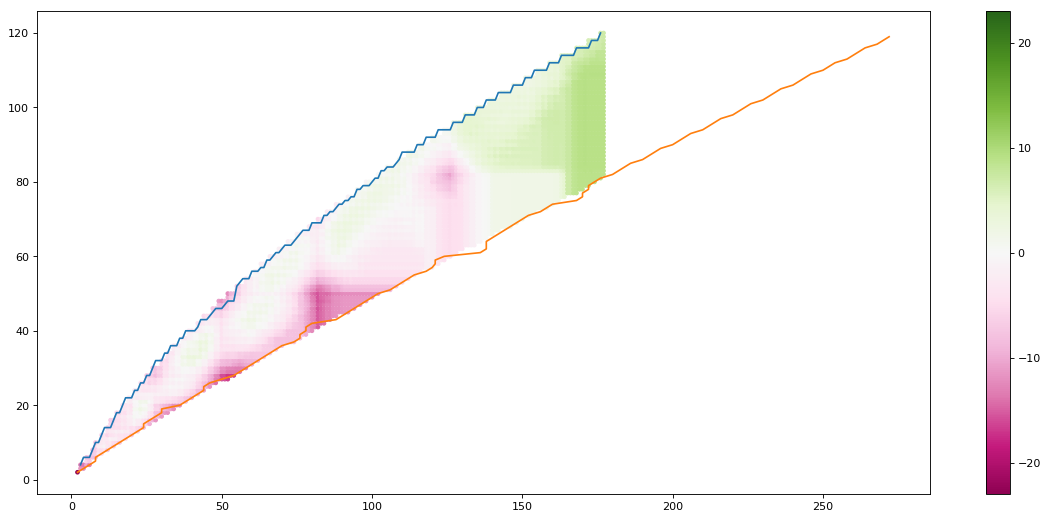

In [16]:
zdripline_ml = np.transpose(np.stack((zdrip_ml,ndep_ml )))
ndripline_ml = np.transpose(np.stack((zdep_ml,ndrip_ml )))


ext = np.int(np.ceil(max(-np.min(diffl),np.max(diffl))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(n_all,z_all,c=diffl,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
#plt.plot(N_exp,Z_exp,c=the_exp_diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)

plt.plot(np.transpose(zdripline_ml)[1][0:-1], np.transpose(zdripline_ml)[0][0:-1],label='python proton drip line')
plt.plot(np.transpose(ndripline_ml)[1][0:-1], np.transpose(ndripline_ml)[0][0:-1],label='python Neutron drip line')
#plt.plot(z_all, n_all,label='python proton drip line')
#plt.plot(z_all, n_all,label='python Neutron drip line')
plt.colorbar(sc)
plt.show()


In [8]:

diffd_ml={}
diffl_ml=[]

z_all_ml=[]
n_all_ml=[]
for z in range(3,121):
    for n in range(3, 178):
        print('z=', z) # 'zdripndep[n]=', zdripndep[n] )
        print('n=', n) # 'ndripzdep[z]=', zdripndep[z], '\n' )
        
        
        #if z<=zdripndep_ml[n]+10 and n<=ndripzdep_ml[z]+10:
            #print(z, n)
        z_all_ml.append(np.array([z]))
        n_all_ml.append(np.array([n]))
        diffl_ml.append(list(rf.predict( [ [z,n  ] ])))
        diffd_ml[z,n]=  list(rf.predict( [ [z,n  ] ] ))
            

            
print(np.shape(n_all_ml))
print(np.shape(z_all_ml))
print(np.shape(diffl_ml))


z= 3
n= 3
z= 3
n= 4
z= 3
n= 5
z= 3
n= 6
z= 3
n= 7
z= 3
n= 8
z= 3
n= 9
z= 3
n= 10
z= 3
n= 11
z= 3
n= 12
z= 3
n= 13
z= 3
n= 14
z= 3
n= 15
z= 3
n= 16
z= 3
n= 17
z= 3
n= 18
z= 3
n= 19
z= 3
n= 20
z= 3
n= 21
z= 3
n= 22
z= 3
n= 23
z= 3
n= 24
z= 3
n= 25
z= 3
n= 26
z= 3
n= 27
z= 3
n= 28
z= 3
n= 29
z= 3
n= 30
z= 3
n= 31
z= 3
n= 32
z= 3
n= 33
z= 3
n= 34
z= 3
n= 35
z= 3
n= 36
z= 3
n= 37
z= 3
n= 38
z= 3
n= 39
z= 3
n= 40
z= 3
n= 41
z= 3
n= 42
z= 3
n= 43
z= 3
n= 44
z= 3
n= 45
z= 3
n= 46
z= 3
n= 47
z= 3
n= 48
z= 3
n= 49
z= 3
n= 50
z= 3
n= 51
z= 3
n= 52
z= 3
n= 53
z= 3
n= 54
z= 3
n= 55
z= 3
n= 56
z= 3
n= 57
z= 3
n= 58
z= 3
n= 59
z= 3
n= 60
z= 3
n= 61
z= 3
n= 62
z= 3
n= 63
z= 3
n= 64
z= 3
n= 65
z= 3
n= 66
z= 3
n= 67
z= 3
n= 68
z= 3
n= 69
z= 3
n= 70
z= 3
n= 71
z= 3
n= 72
z= 3
n= 73
z= 3
n= 74
z= 3
n= 75
z= 3
n= 76
z= 3
n= 77
z= 3
n= 78
z= 3
n= 79
z= 3
n= 80
z= 3
n= 81
z= 3
n= 82
z= 3
n= 83
z= 3
n= 84
z= 3
n= 85
z= 3
n= 86
z= 3
n= 87
z= 3
n= 88
z= 3
n= 89
z= 3
n= 90
z= 3
n= 91
z= 3
n= 92
z= 3
n= 93
z= 3
n

n= 23
z= 7
n= 24
z= 7
n= 25
z= 7
n= 26
z= 7
n= 27
z= 7
n= 28
z= 7
n= 29
z= 7
n= 30
z= 7
n= 31
z= 7
n= 32
z= 7
n= 33
z= 7
n= 34
z= 7
n= 35
z= 7
n= 36
z= 7
n= 37
z= 7
n= 38
z= 7
n= 39
z= 7
n= 40
z= 7
n= 41
z= 7
n= 42
z= 7
n= 43
z= 7
n= 44
z= 7
n= 45
z= 7
n= 46
z= 7
n= 47
z= 7
n= 48
z= 7
n= 49
z= 7
n= 50
z= 7
n= 51
z= 7
n= 52
z= 7
n= 53
z= 7
n= 54
z= 7
n= 55
z= 7
n= 56
z= 7
n= 57
z= 7
n= 58
z= 7
n= 59
z= 7
n= 60
z= 7
n= 61
z= 7
n= 62
z= 7
n= 63
z= 7
n= 64
z= 7
n= 65
z= 7
n= 66
z= 7
n= 67
z= 7
n= 68
z= 7
n= 69
z= 7
n= 70
z= 7
n= 71
z= 7
n= 72
z= 7
n= 73
z= 7
n= 74
z= 7
n= 75
z= 7
n= 76
z= 7
n= 77
z= 7
n= 78
z= 7
n= 79
z= 7
n= 80
z= 7
n= 81
z= 7
n= 82
z= 7
n= 83
z= 7
n= 84
z= 7
n= 85
z= 7
n= 86
z= 7
n= 87
z= 7
n= 88
z= 7
n= 89
z= 7
n= 90
z= 7
n= 91
z= 7
n= 92
z= 7
n= 93
z= 7
n= 94
z= 7
n= 95
z= 7
n= 96
z= 7
n= 97
z= 7
n= 98
z= 7
n= 99
z= 7
n= 100
z= 7
n= 101
z= 7
n= 102
z= 7
n= 103
z= 7
n= 104
z= 7
n= 105
z= 7
n= 106
z= 7
n= 107
z= 7
n= 108
z= 7
n= 109
z= 7
n= 110
z= 7
n= 111
z= 7
n= 112
z=

z= 11
n= 28
z= 11
n= 29
z= 11
n= 30
z= 11
n= 31
z= 11
n= 32
z= 11
n= 33
z= 11
n= 34
z= 11
n= 35
z= 11
n= 36
z= 11
n= 37
z= 11
n= 38
z= 11
n= 39
z= 11
n= 40
z= 11
n= 41
z= 11
n= 42
z= 11
n= 43
z= 11
n= 44
z= 11
n= 45
z= 11
n= 46
z= 11
n= 47
z= 11
n= 48
z= 11
n= 49
z= 11
n= 50
z= 11
n= 51
z= 11
n= 52
z= 11
n= 53
z= 11
n= 54
z= 11
n= 55
z= 11
n= 56
z= 11
n= 57
z= 11
n= 58
z= 11
n= 59
z= 11
n= 60
z= 11
n= 61
z= 11
n= 62
z= 11
n= 63
z= 11
n= 64
z= 11
n= 65
z= 11
n= 66
z= 11
n= 67
z= 11
n= 68
z= 11
n= 69
z= 11
n= 70
z= 11
n= 71
z= 11
n= 72
z= 11
n= 73
z= 11
n= 74
z= 11
n= 75
z= 11
n= 76
z= 11
n= 77
z= 11
n= 78
z= 11
n= 79
z= 11
n= 80
z= 11
n= 81
z= 11
n= 82
z= 11
n= 83
z= 11
n= 84
z= 11
n= 85
z= 11
n= 86
z= 11
n= 87
z= 11
n= 88
z= 11
n= 89
z= 11
n= 90
z= 11
n= 91
z= 11
n= 92
z= 11
n= 93
z= 11
n= 94
z= 11
n= 95
z= 11
n= 96
z= 11
n= 97
z= 11
n= 98
z= 11
n= 99
z= 11
n= 100
z= 11
n= 101
z= 11
n= 102
z= 11
n= 103
z= 11
n= 104
z= 11
n= 105
z= 11
n= 106
z= 11
n= 107
z= 11
n= 108
z= 11
n= 109
z= 11


z= 14
n= 163
z= 14
n= 164
z= 14
n= 165
z= 14
n= 166
z= 14
n= 167
z= 14
n= 168
z= 14
n= 169
z= 14
n= 170
z= 14
n= 171
z= 14
n= 172
z= 14
n= 173
z= 14
n= 174
z= 14
n= 175
z= 14
n= 176
z= 14
n= 177
z= 15
n= 3
z= 15
n= 4
z= 15
n= 5
z= 15
n= 6
z= 15
n= 7
z= 15
n= 8
z= 15
n= 9
z= 15
n= 10
z= 15
n= 11
z= 15
n= 12
z= 15
n= 13
z= 15
n= 14
z= 15
n= 15
z= 15
n= 16
z= 15
n= 17
z= 15
n= 18
z= 15
n= 19
z= 15
n= 20
z= 15
n= 21
z= 15
n= 22
z= 15
n= 23
z= 15
n= 24
z= 15
n= 25
z= 15
n= 26
z= 15
n= 27
z= 15
n= 28
z= 15
n= 29
z= 15
n= 30
z= 15
n= 31
z= 15
n= 32
z= 15
n= 33
z= 15
n= 34
z= 15
n= 35
z= 15
n= 36
z= 15
n= 37
z= 15
n= 38
z= 15
n= 39
z= 15
n= 40
z= 15
n= 41
z= 15
n= 42
z= 15
n= 43
z= 15
n= 44
z= 15
n= 45
z= 15
n= 46
z= 15
n= 47
z= 15
n= 48
z= 15
n= 49
z= 15
n= 50
z= 15
n= 51
z= 15
n= 52
z= 15
n= 53
z= 15
n= 54
z= 15
n= 55
z= 15
n= 56
z= 15
n= 57
z= 15
n= 58
z= 15
n= 59
z= 15
n= 60
z= 15
n= 61
z= 15
n= 62
z= 15
n= 63
z= 15
n= 64
z= 15
n= 65
z= 15
n= 66
z= 15
n= 67
z= 15
n= 68
z= 15
n= 69
z= 15
n=

z= 18
n= 128
z= 18
n= 129
z= 18
n= 130
z= 18
n= 131
z= 18
n= 132
z= 18
n= 133
z= 18
n= 134
z= 18
n= 135
z= 18
n= 136
z= 18
n= 137
z= 18
n= 138
z= 18
n= 139
z= 18
n= 140
z= 18
n= 141
z= 18
n= 142
z= 18
n= 143
z= 18
n= 144
z= 18
n= 145
z= 18
n= 146
z= 18
n= 147
z= 18
n= 148
z= 18
n= 149
z= 18
n= 150
z= 18
n= 151
z= 18
n= 152
z= 18
n= 153
z= 18
n= 154
z= 18
n= 155
z= 18
n= 156
z= 18
n= 157
z= 18
n= 158
z= 18
n= 159
z= 18
n= 160
z= 18
n= 161
z= 18
n= 162
z= 18
n= 163
z= 18
n= 164
z= 18
n= 165
z= 18
n= 166
z= 18
n= 167
z= 18
n= 168
z= 18
n= 169
z= 18
n= 170
z= 18
n= 171
z= 18
n= 172
z= 18
n= 173
z= 18
n= 174
z= 18
n= 175
z= 18
n= 176
z= 18
n= 177
z= 19
n= 3
z= 19
n= 4
z= 19
n= 5
z= 19
n= 6
z= 19
n= 7
z= 19
n= 8
z= 19
n= 9
z= 19
n= 10
z= 19
n= 11
z= 19
n= 12
z= 19
n= 13
z= 19
n= 14
z= 19
n= 15
z= 19
n= 16
z= 19
n= 17
z= 19
n= 18
z= 19
n= 19
z= 19
n= 20
z= 19
n= 21
z= 19
n= 22
z= 19
n= 23
z= 19
n= 24
z= 19
n= 25
z= 19
n= 26
z= 19
n= 27
z= 19
n= 28
z= 19
n= 29
z= 19
n= 30
z= 19
n= 31
z= 19
n= 

z= 22
n= 92
z= 22
n= 93
z= 22
n= 94
z= 22
n= 95
z= 22
n= 96
z= 22
n= 97
z= 22
n= 98
z= 22
n= 99
z= 22
n= 100
z= 22
n= 101
z= 22
n= 102
z= 22
n= 103
z= 22
n= 104
z= 22
n= 105
z= 22
n= 106
z= 22
n= 107
z= 22
n= 108
z= 22
n= 109
z= 22
n= 110
z= 22
n= 111
z= 22
n= 112
z= 22
n= 113
z= 22
n= 114
z= 22
n= 115
z= 22
n= 116
z= 22
n= 117
z= 22
n= 118
z= 22
n= 119
z= 22
n= 120
z= 22
n= 121
z= 22
n= 122
z= 22
n= 123
z= 22
n= 124
z= 22
n= 125
z= 22
n= 126
z= 22
n= 127
z= 22
n= 128
z= 22
n= 129
z= 22
n= 130
z= 22
n= 131
z= 22
n= 132
z= 22
n= 133
z= 22
n= 134
z= 22
n= 135
z= 22
n= 136
z= 22
n= 137
z= 22
n= 138
z= 22
n= 139
z= 22
n= 140
z= 22
n= 141
z= 22
n= 142
z= 22
n= 143
z= 22
n= 144
z= 22
n= 145
z= 22
n= 146
z= 22
n= 147
z= 22
n= 148
z= 22
n= 149
z= 22
n= 150
z= 22
n= 151
z= 22
n= 152
z= 22
n= 153
z= 22
n= 154
z= 22
n= 155
z= 22
n= 156
z= 22
n= 157
z= 22
n= 158
z= 22
n= 159
z= 22
n= 160
z= 22
n= 161
z= 22
n= 162
z= 22
n= 163
z= 22
n= 164
z= 22
n= 165
z= 22
n= 166
z= 22
n= 167
z= 22
n= 168
z= 22
n

z= 26
n= 55
z= 26
n= 56
z= 26
n= 57
z= 26
n= 58
z= 26
n= 59
z= 26
n= 60
z= 26
n= 61
z= 26
n= 62
z= 26
n= 63
z= 26
n= 64
z= 26
n= 65
z= 26
n= 66
z= 26
n= 67
z= 26
n= 68
z= 26
n= 69
z= 26
n= 70
z= 26
n= 71
z= 26
n= 72
z= 26
n= 73
z= 26
n= 74
z= 26
n= 75
z= 26
n= 76
z= 26
n= 77
z= 26
n= 78
z= 26
n= 79
z= 26
n= 80
z= 26
n= 81
z= 26
n= 82
z= 26
n= 83
z= 26
n= 84
z= 26
n= 85
z= 26
n= 86
z= 26
n= 87
z= 26
n= 88
z= 26
n= 89
z= 26
n= 90
z= 26
n= 91
z= 26
n= 92
z= 26
n= 93
z= 26
n= 94
z= 26
n= 95
z= 26
n= 96
z= 26
n= 97
z= 26
n= 98
z= 26
n= 99
z= 26
n= 100
z= 26
n= 101
z= 26
n= 102
z= 26
n= 103
z= 26
n= 104
z= 26
n= 105
z= 26
n= 106
z= 26
n= 107
z= 26
n= 108
z= 26
n= 109
z= 26
n= 110
z= 26
n= 111
z= 26
n= 112
z= 26
n= 113
z= 26
n= 114
z= 26
n= 115
z= 26
n= 116
z= 26
n= 117
z= 26
n= 118
z= 26
n= 119
z= 26
n= 120
z= 26
n= 121
z= 26
n= 122
z= 26
n= 123
z= 26
n= 124
z= 26
n= 125
z= 26
n= 126
z= 26
n= 127
z= 26
n= 128
z= 26
n= 129
z= 26
n= 130
z= 26
n= 131
z= 26
n= 132
z= 26
n= 133
z= 26
n= 134
z= 26

z= 30
n= 16
z= 30
n= 17
z= 30
n= 18
z= 30
n= 19
z= 30
n= 20
z= 30
n= 21
z= 30
n= 22
z= 30
n= 23
z= 30
n= 24
z= 30
n= 25
z= 30
n= 26
z= 30
n= 27
z= 30
n= 28
z= 30
n= 29
z= 30
n= 30
z= 30
n= 31
z= 30
n= 32
z= 30
n= 33
z= 30
n= 34
z= 30
n= 35
z= 30
n= 36
z= 30
n= 37
z= 30
n= 38
z= 30
n= 39
z= 30
n= 40
z= 30
n= 41
z= 30
n= 42
z= 30
n= 43
z= 30
n= 44
z= 30
n= 45
z= 30
n= 46
z= 30
n= 47
z= 30
n= 48
z= 30
n= 49
z= 30
n= 50
z= 30
n= 51
z= 30
n= 52
z= 30
n= 53
z= 30
n= 54
z= 30
n= 55
z= 30
n= 56
z= 30
n= 57
z= 30
n= 58
z= 30
n= 59
z= 30
n= 60
z= 30
n= 61
z= 30
n= 62
z= 30
n= 63
z= 30
n= 64
z= 30
n= 65
z= 30
n= 66
z= 30
n= 67
z= 30
n= 68
z= 30
n= 69
z= 30
n= 70
z= 30
n= 71
z= 30
n= 72
z= 30
n= 73
z= 30
n= 74
z= 30
n= 75
z= 30
n= 76
z= 30
n= 77
z= 30
n= 78
z= 30
n= 79
z= 30
n= 80
z= 30
n= 81
z= 30
n= 82
z= 30
n= 83
z= 30
n= 84
z= 30
n= 85
z= 30
n= 86
z= 30
n= 87
z= 30
n= 88
z= 30
n= 89
z= 30
n= 90
z= 30
n= 91
z= 30
n= 92
z= 30
n= 93
z= 30
n= 94
z= 30
n= 95
z= 30
n= 96
z= 30
n= 97
z= 30
n= 98
z= 3

z= 33
n= 154
z= 33
n= 155
z= 33
n= 156
z= 33
n= 157
z= 33
n= 158
z= 33
n= 159
z= 33
n= 160
z= 33
n= 161
z= 33
n= 162
z= 33
n= 163
z= 33
n= 164
z= 33
n= 165
z= 33
n= 166
z= 33
n= 167
z= 33
n= 168
z= 33
n= 169
z= 33
n= 170
z= 33
n= 171
z= 33
n= 172
z= 33
n= 173
z= 33
n= 174
z= 33
n= 175
z= 33
n= 176
z= 33
n= 177
z= 34
n= 3
z= 34
n= 4
z= 34
n= 5
z= 34
n= 6
z= 34
n= 7
z= 34
n= 8
z= 34
n= 9
z= 34
n= 10
z= 34
n= 11
z= 34
n= 12
z= 34
n= 13
z= 34
n= 14
z= 34
n= 15
z= 34
n= 16
z= 34
n= 17
z= 34
n= 18
z= 34
n= 19
z= 34
n= 20
z= 34
n= 21
z= 34
n= 22
z= 34
n= 23
z= 34
n= 24
z= 34
n= 25
z= 34
n= 26
z= 34
n= 27
z= 34
n= 28
z= 34
n= 29
z= 34
n= 30
z= 34
n= 31
z= 34
n= 32
z= 34
n= 33
z= 34
n= 34
z= 34
n= 35
z= 34
n= 36
z= 34
n= 37
z= 34
n= 38
z= 34
n= 39
z= 34
n= 40
z= 34
n= 41
z= 34
n= 42
z= 34
n= 43
z= 34
n= 44
z= 34
n= 45
z= 34
n= 46
z= 34
n= 47
z= 34
n= 48
z= 34
n= 49
z= 34
n= 50
z= 34
n= 51
z= 34
n= 52
z= 34
n= 53
z= 34
n= 54
z= 34
n= 55
z= 34
n= 56
z= 34
n= 57
z= 34
n= 58
z= 34
n= 59
z= 34
n= 60

z= 37
n= 117
z= 37
n= 118
z= 37
n= 119
z= 37
n= 120
z= 37
n= 121
z= 37
n= 122
z= 37
n= 123
z= 37
n= 124
z= 37
n= 125
z= 37
n= 126
z= 37
n= 127
z= 37
n= 128
z= 37
n= 129
z= 37
n= 130
z= 37
n= 131
z= 37
n= 132
z= 37
n= 133
z= 37
n= 134
z= 37
n= 135
z= 37
n= 136
z= 37
n= 137
z= 37
n= 138
z= 37
n= 139
z= 37
n= 140
z= 37
n= 141
z= 37
n= 142
z= 37
n= 143
z= 37
n= 144
z= 37
n= 145
z= 37
n= 146
z= 37
n= 147
z= 37
n= 148
z= 37
n= 149
z= 37
n= 150
z= 37
n= 151
z= 37
n= 152
z= 37
n= 153
z= 37
n= 154
z= 37
n= 155
z= 37
n= 156
z= 37
n= 157
z= 37
n= 158
z= 37
n= 159
z= 37
n= 160
z= 37
n= 161
z= 37
n= 162
z= 37
n= 163
z= 37
n= 164
z= 37
n= 165
z= 37
n= 166
z= 37
n= 167
z= 37
n= 168
z= 37
n= 169
z= 37
n= 170
z= 37
n= 171
z= 37
n= 172
z= 37
n= 173
z= 37
n= 174
z= 37
n= 175
z= 37
n= 176
z= 37
n= 177
z= 38
n= 3
z= 38
n= 4
z= 38
n= 5
z= 38
n= 6
z= 38
n= 7
z= 38
n= 8
z= 38
n= 9
z= 38
n= 10
z= 38
n= 11
z= 38
n= 12
z= 38
n= 13
z= 38
n= 14
z= 38
n= 15
z= 38
n= 16
z= 38
n= 17
z= 38
n= 18
z= 38
n= 19
z= 38
n= 2

z= 41
n= 78
z= 41
n= 79
z= 41
n= 80
z= 41
n= 81
z= 41
n= 82
z= 41
n= 83
z= 41
n= 84
z= 41
n= 85
z= 41
n= 86
z= 41
n= 87
z= 41
n= 88
z= 41
n= 89
z= 41
n= 90
z= 41
n= 91
z= 41
n= 92
z= 41
n= 93
z= 41
n= 94
z= 41
n= 95
z= 41
n= 96
z= 41
n= 97
z= 41
n= 98
z= 41
n= 99
z= 41
n= 100
z= 41
n= 101
z= 41
n= 102
z= 41
n= 103
z= 41
n= 104
z= 41
n= 105
z= 41
n= 106
z= 41
n= 107
z= 41
n= 108
z= 41
n= 109
z= 41
n= 110
z= 41
n= 111
z= 41
n= 112
z= 41
n= 113
z= 41
n= 114
z= 41
n= 115
z= 41
n= 116
z= 41
n= 117
z= 41
n= 118
z= 41
n= 119
z= 41
n= 120
z= 41
n= 121
z= 41
n= 122
z= 41
n= 123
z= 41
n= 124
z= 41
n= 125
z= 41
n= 126
z= 41
n= 127
z= 41
n= 128
z= 41
n= 129
z= 41
n= 130
z= 41
n= 131
z= 41
n= 132
z= 41
n= 133
z= 41
n= 134
z= 41
n= 135
z= 41
n= 136
z= 41
n= 137
z= 41
n= 138
z= 41
n= 139
z= 41
n= 140
z= 41
n= 141
z= 41
n= 142
z= 41
n= 143
z= 41
n= 144
z= 41
n= 145
z= 41
n= 146
z= 41
n= 147
z= 41
n= 148
z= 41
n= 149
z= 41
n= 150
z= 41
n= 151
z= 41
n= 152
z= 41
n= 153
z= 41
n= 154
z= 41
n= 155
z= 41
n=

z= 45
n= 39
z= 45
n= 40
z= 45
n= 41
z= 45
n= 42
z= 45
n= 43
z= 45
n= 44
z= 45
n= 45
z= 45
n= 46
z= 45
n= 47
z= 45
n= 48
z= 45
n= 49
z= 45
n= 50
z= 45
n= 51
z= 45
n= 52
z= 45
n= 53
z= 45
n= 54
z= 45
n= 55
z= 45
n= 56
z= 45
n= 57
z= 45
n= 58
z= 45
n= 59
z= 45
n= 60
z= 45
n= 61
z= 45
n= 62
z= 45
n= 63
z= 45
n= 64
z= 45
n= 65
z= 45
n= 66
z= 45
n= 67
z= 45
n= 68
z= 45
n= 69
z= 45
n= 70
z= 45
n= 71
z= 45
n= 72
z= 45
n= 73
z= 45
n= 74
z= 45
n= 75
z= 45
n= 76
z= 45
n= 77
z= 45
n= 78
z= 45
n= 79
z= 45
n= 80
z= 45
n= 81
z= 45
n= 82
z= 45
n= 83
z= 45
n= 84
z= 45
n= 85
z= 45
n= 86
z= 45
n= 87
z= 45
n= 88
z= 45
n= 89
z= 45
n= 90
z= 45
n= 91
z= 45
n= 92
z= 45
n= 93
z= 45
n= 94
z= 45
n= 95
z= 45
n= 96
z= 45
n= 97
z= 45
n= 98
z= 45
n= 99
z= 45
n= 100
z= 45
n= 101
z= 45
n= 102
z= 45
n= 103
z= 45
n= 104
z= 45
n= 105
z= 45
n= 106
z= 45
n= 107
z= 45
n= 108
z= 45
n= 109
z= 45
n= 110
z= 45
n= 111
z= 45
n= 112
z= 45
n= 113
z= 45
n= 114
z= 45
n= 115
z= 45
n= 116
z= 45
n= 117
z= 45
n= 118
z= 45
n= 119
z= 45
n=

z= 48
n= 173
z= 48
n= 174
z= 48
n= 175
z= 48
n= 176
z= 48
n= 177
z= 49
n= 3
z= 49
n= 4
z= 49
n= 5
z= 49
n= 6
z= 49
n= 7
z= 49
n= 8
z= 49
n= 9
z= 49
n= 10
z= 49
n= 11
z= 49
n= 12
z= 49
n= 13
z= 49
n= 14
z= 49
n= 15
z= 49
n= 16
z= 49
n= 17
z= 49
n= 18
z= 49
n= 19
z= 49
n= 20
z= 49
n= 21
z= 49
n= 22
z= 49
n= 23
z= 49
n= 24
z= 49
n= 25
z= 49
n= 26
z= 49
n= 27
z= 49
n= 28
z= 49
n= 29
z= 49
n= 30
z= 49
n= 31
z= 49
n= 32
z= 49
n= 33
z= 49
n= 34
z= 49
n= 35
z= 49
n= 36
z= 49
n= 37
z= 49
n= 38
z= 49
n= 39
z= 49
n= 40
z= 49
n= 41
z= 49
n= 42
z= 49
n= 43
z= 49
n= 44
z= 49
n= 45
z= 49
n= 46
z= 49
n= 47
z= 49
n= 48
z= 49
n= 49
z= 49
n= 50
z= 49
n= 51
z= 49
n= 52
z= 49
n= 53
z= 49
n= 54
z= 49
n= 55
z= 49
n= 56
z= 49
n= 57
z= 49
n= 58
z= 49
n= 59
z= 49
n= 60
z= 49
n= 61
z= 49
n= 62
z= 49
n= 63
z= 49
n= 64
z= 49
n= 65
z= 49
n= 66
z= 49
n= 67
z= 49
n= 68
z= 49
n= 69
z= 49
n= 70
z= 49
n= 71
z= 49
n= 72
z= 49
n= 73
z= 49
n= 74
z= 49
n= 75
z= 49
n= 76
z= 49
n= 77
z= 49
n= 78
z= 49
n= 79
z= 49
n= 80
z= 49


z= 52
n= 136
z= 52
n= 137
z= 52
n= 138
z= 52
n= 139
z= 52
n= 140
z= 52
n= 141
z= 52
n= 142
z= 52
n= 143
z= 52
n= 144
z= 52
n= 145
z= 52
n= 146
z= 52
n= 147
z= 52
n= 148
z= 52
n= 149
z= 52
n= 150
z= 52
n= 151
z= 52
n= 152
z= 52
n= 153
z= 52
n= 154
z= 52
n= 155
z= 52
n= 156
z= 52
n= 157
z= 52
n= 158
z= 52
n= 159
z= 52
n= 160
z= 52
n= 161
z= 52
n= 162
z= 52
n= 163
z= 52
n= 164
z= 52
n= 165
z= 52
n= 166
z= 52
n= 167
z= 52
n= 168
z= 52
n= 169
z= 52
n= 170
z= 52
n= 171
z= 52
n= 172
z= 52
n= 173
z= 52
n= 174
z= 52
n= 175
z= 52
n= 176
z= 52
n= 177
z= 53
n= 3
z= 53
n= 4
z= 53
n= 5
z= 53
n= 6
z= 53
n= 7
z= 53
n= 8
z= 53
n= 9
z= 53
n= 10
z= 53
n= 11
z= 53
n= 12
z= 53
n= 13
z= 53
n= 14
z= 53
n= 15
z= 53
n= 16
z= 53
n= 17
z= 53
n= 18
z= 53
n= 19
z= 53
n= 20
z= 53
n= 21
z= 53
n= 22
z= 53
n= 23
z= 53
n= 24
z= 53
n= 25
z= 53
n= 26
z= 53
n= 27
z= 53
n= 28
z= 53
n= 29
z= 53
n= 30
z= 53
n= 31
z= 53
n= 32
z= 53
n= 33
z= 53
n= 34
z= 53
n= 35
z= 53
n= 36
z= 53
n= 37
z= 53
n= 38
z= 53
n= 39
z= 53
n= 40
z= 53

z= 56
n= 101
z= 56
n= 102
z= 56
n= 103
z= 56
n= 104
z= 56
n= 105
z= 56
n= 106
z= 56
n= 107
z= 56
n= 108
z= 56
n= 109
z= 56
n= 110
z= 56
n= 111
z= 56
n= 112
z= 56
n= 113
z= 56
n= 114
z= 56
n= 115
z= 56
n= 116
z= 56
n= 117
z= 56
n= 118
z= 56
n= 119
z= 56
n= 120
z= 56
n= 121
z= 56
n= 122
z= 56
n= 123
z= 56
n= 124
z= 56
n= 125
z= 56
n= 126
z= 56
n= 127
z= 56
n= 128
z= 56
n= 129
z= 56
n= 130
z= 56
n= 131
z= 56
n= 132
z= 56
n= 133
z= 56
n= 134
z= 56
n= 135
z= 56
n= 136
z= 56
n= 137
z= 56
n= 138
z= 56
n= 139
z= 56
n= 140
z= 56
n= 141
z= 56
n= 142
z= 56
n= 143
z= 56
n= 144
z= 56
n= 145
z= 56
n= 146
z= 56
n= 147
z= 56
n= 148
z= 56
n= 149
z= 56
n= 150
z= 56
n= 151
z= 56
n= 152
z= 56
n= 153
z= 56
n= 154
z= 56
n= 155
z= 56
n= 156
z= 56
n= 157
z= 56
n= 158
z= 56
n= 159
z= 56
n= 160
z= 56
n= 161
z= 56
n= 162
z= 56
n= 163
z= 56
n= 164
z= 56
n= 165
z= 56
n= 166
z= 56
n= 167
z= 56
n= 168
z= 56
n= 169
z= 56
n= 170
z= 56
n= 171
z= 56
n= 172
z= 56
n= 173
z= 56
n= 174
z= 56
n= 175
z= 56
n= 176
z= 56
n= 177

z= 60
n= 61
z= 60
n= 62
z= 60
n= 63
z= 60
n= 64
z= 60
n= 65
z= 60
n= 66
z= 60
n= 67
z= 60
n= 68
z= 60
n= 69
z= 60
n= 70
z= 60
n= 71
z= 60
n= 72
z= 60
n= 73
z= 60
n= 74
z= 60
n= 75
z= 60
n= 76
z= 60
n= 77
z= 60
n= 78
z= 60
n= 79
z= 60
n= 80
z= 60
n= 81
z= 60
n= 82
z= 60
n= 83
z= 60
n= 84
z= 60
n= 85
z= 60
n= 86
z= 60
n= 87
z= 60
n= 88
z= 60
n= 89
z= 60
n= 90
z= 60
n= 91
z= 60
n= 92
z= 60
n= 93
z= 60
n= 94
z= 60
n= 95
z= 60
n= 96
z= 60
n= 97
z= 60
n= 98
z= 60
n= 99
z= 60
n= 100
z= 60
n= 101
z= 60
n= 102
z= 60
n= 103
z= 60
n= 104
z= 60
n= 105
z= 60
n= 106
z= 60
n= 107
z= 60
n= 108
z= 60
n= 109
z= 60
n= 110
z= 60
n= 111
z= 60
n= 112
z= 60
n= 113
z= 60
n= 114
z= 60
n= 115
z= 60
n= 116
z= 60
n= 117
z= 60
n= 118
z= 60
n= 119
z= 60
n= 120
z= 60
n= 121
z= 60
n= 122
z= 60
n= 123
z= 60
n= 124
z= 60
n= 125
z= 60
n= 126
z= 60
n= 127
z= 60
n= 128
z= 60
n= 129
z= 60
n= 130
z= 60
n= 131
z= 60
n= 132
z= 60
n= 133
z= 60
n= 134
z= 60
n= 135
z= 60
n= 136
z= 60
n= 137
z= 60
n= 138
z= 60
n= 139
z= 60
n= 140

z= 64
n= 21
z= 64
n= 22
z= 64
n= 23
z= 64
n= 24
z= 64
n= 25
z= 64
n= 26
z= 64
n= 27
z= 64
n= 28
z= 64
n= 29
z= 64
n= 30
z= 64
n= 31
z= 64
n= 32
z= 64
n= 33
z= 64
n= 34
z= 64
n= 35
z= 64
n= 36
z= 64
n= 37
z= 64
n= 38
z= 64
n= 39
z= 64
n= 40
z= 64
n= 41
z= 64
n= 42
z= 64
n= 43
z= 64
n= 44
z= 64
n= 45
z= 64
n= 46
z= 64
n= 47
z= 64
n= 48
z= 64
n= 49
z= 64
n= 50
z= 64
n= 51
z= 64
n= 52
z= 64
n= 53
z= 64
n= 54
z= 64
n= 55
z= 64
n= 56
z= 64
n= 57
z= 64
n= 58
z= 64
n= 59
z= 64
n= 60
z= 64
n= 61
z= 64
n= 62
z= 64
n= 63
z= 64
n= 64
z= 64
n= 65
z= 64
n= 66
z= 64
n= 67
z= 64
n= 68
z= 64
n= 69
z= 64
n= 70
z= 64
n= 71
z= 64
n= 72
z= 64
n= 73
z= 64
n= 74
z= 64
n= 75
z= 64
n= 76
z= 64
n= 77
z= 64
n= 78
z= 64
n= 79
z= 64
n= 80
z= 64
n= 81
z= 64
n= 82
z= 64
n= 83
z= 64
n= 84
z= 64
n= 85
z= 64
n= 86
z= 64
n= 87
z= 64
n= 88
z= 64
n= 89
z= 64
n= 90
z= 64
n= 91
z= 64
n= 92
z= 64
n= 93
z= 64
n= 94
z= 64
n= 95
z= 64
n= 96
z= 64
n= 97
z= 64
n= 98
z= 64
n= 99
z= 64
n= 100
z= 64
n= 101
z= 64
n= 102
z= 64
n= 103


z= 67
n= 160
z= 67
n= 161
z= 67
n= 162
z= 67
n= 163
z= 67
n= 164
z= 67
n= 165
z= 67
n= 166
z= 67
n= 167
z= 67
n= 168
z= 67
n= 169
z= 67
n= 170
z= 67
n= 171
z= 67
n= 172
z= 67
n= 173
z= 67
n= 174
z= 67
n= 175
z= 67
n= 176
z= 67
n= 177
z= 68
n= 3
z= 68
n= 4
z= 68
n= 5
z= 68
n= 6
z= 68
n= 7
z= 68
n= 8
z= 68
n= 9
z= 68
n= 10
z= 68
n= 11
z= 68
n= 12
z= 68
n= 13
z= 68
n= 14
z= 68
n= 15
z= 68
n= 16
z= 68
n= 17
z= 68
n= 18
z= 68
n= 19
z= 68
n= 20
z= 68
n= 21
z= 68
n= 22
z= 68
n= 23
z= 68
n= 24
z= 68
n= 25
z= 68
n= 26
z= 68
n= 27
z= 68
n= 28
z= 68
n= 29
z= 68
n= 30
z= 68
n= 31
z= 68
n= 32
z= 68
n= 33
z= 68
n= 34
z= 68
n= 35
z= 68
n= 36
z= 68
n= 37
z= 68
n= 38
z= 68
n= 39
z= 68
n= 40
z= 68
n= 41
z= 68
n= 42
z= 68
n= 43
z= 68
n= 44
z= 68
n= 45
z= 68
n= 46
z= 68
n= 47
z= 68
n= 48
z= 68
n= 49
z= 68
n= 50
z= 68
n= 51
z= 68
n= 52
z= 68
n= 53
z= 68
n= 54
z= 68
n= 55
z= 68
n= 56
z= 68
n= 57
z= 68
n= 58
z= 68
n= 59
z= 68
n= 60
z= 68
n= 61
z= 68
n= 62
z= 68
n= 63
z= 68
n= 64
z= 68
n= 65
z= 68
n= 66
z= 68

z= 71
n= 124
z= 71
n= 125
z= 71
n= 126
z= 71
n= 127
z= 71
n= 128
z= 71
n= 129
z= 71
n= 130
z= 71
n= 131
z= 71
n= 132
z= 71
n= 133
z= 71
n= 134
z= 71
n= 135
z= 71
n= 136
z= 71
n= 137
z= 71
n= 138
z= 71
n= 139
z= 71
n= 140
z= 71
n= 141
z= 71
n= 142
z= 71
n= 143
z= 71
n= 144
z= 71
n= 145
z= 71
n= 146
z= 71
n= 147
z= 71
n= 148
z= 71
n= 149
z= 71
n= 150
z= 71
n= 151
z= 71
n= 152
z= 71
n= 153
z= 71
n= 154
z= 71
n= 155
z= 71
n= 156
z= 71
n= 157
z= 71
n= 158
z= 71
n= 159
z= 71
n= 160
z= 71
n= 161
z= 71
n= 162
z= 71
n= 163
z= 71
n= 164
z= 71
n= 165
z= 71
n= 166
z= 71
n= 167
z= 71
n= 168
z= 71
n= 169
z= 71
n= 170
z= 71
n= 171
z= 71
n= 172
z= 71
n= 173
z= 71
n= 174
z= 71
n= 175
z= 71
n= 176
z= 71
n= 177
z= 72
n= 3
z= 72
n= 4
z= 72
n= 5
z= 72
n= 6
z= 72
n= 7
z= 72
n= 8
z= 72
n= 9
z= 72
n= 10
z= 72
n= 11
z= 72
n= 12
z= 72
n= 13
z= 72
n= 14
z= 72
n= 15
z= 72
n= 16
z= 72
n= 17
z= 72
n= 18
z= 72
n= 19
z= 72
n= 20
z= 72
n= 21
z= 72
n= 22
z= 72
n= 23
z= 72
n= 24
z= 72
n= 25
z= 72
n= 26
z= 72
n= 27
z= 72

z= 75
n= 88
z= 75
n= 89
z= 75
n= 90
z= 75
n= 91
z= 75
n= 92
z= 75
n= 93
z= 75
n= 94
z= 75
n= 95
z= 75
n= 96
z= 75
n= 97
z= 75
n= 98
z= 75
n= 99
z= 75
n= 100
z= 75
n= 101
z= 75
n= 102
z= 75
n= 103
z= 75
n= 104
z= 75
n= 105
z= 75
n= 106
z= 75
n= 107
z= 75
n= 108
z= 75
n= 109
z= 75
n= 110
z= 75
n= 111
z= 75
n= 112
z= 75
n= 113
z= 75
n= 114
z= 75
n= 115
z= 75
n= 116
z= 75
n= 117
z= 75
n= 118
z= 75
n= 119
z= 75
n= 120
z= 75
n= 121
z= 75
n= 122
z= 75
n= 123
z= 75
n= 124
z= 75
n= 125
z= 75
n= 126
z= 75
n= 127
z= 75
n= 128
z= 75
n= 129
z= 75
n= 130
z= 75
n= 131
z= 75
n= 132
z= 75
n= 133
z= 75
n= 134
z= 75
n= 135
z= 75
n= 136
z= 75
n= 137
z= 75
n= 138
z= 75
n= 139
z= 75
n= 140
z= 75
n= 141
z= 75
n= 142
z= 75
n= 143
z= 75
n= 144
z= 75
n= 145
z= 75
n= 146
z= 75
n= 147
z= 75
n= 148
z= 75
n= 149
z= 75
n= 150
z= 75
n= 151
z= 75
n= 152
z= 75
n= 153
z= 75
n= 154
z= 75
n= 155
z= 75
n= 156
z= 75
n= 157
z= 75
n= 158
z= 75
n= 159
z= 75
n= 160
z= 75
n= 161
z= 75
n= 162
z= 75
n= 163
z= 75
n= 164
z= 75
n= 16

z= 79
n= 49
z= 79
n= 50
z= 79
n= 51
z= 79
n= 52
z= 79
n= 53
z= 79
n= 54
z= 79
n= 55
z= 79
n= 56
z= 79
n= 57
z= 79
n= 58
z= 79
n= 59
z= 79
n= 60
z= 79
n= 61
z= 79
n= 62
z= 79
n= 63
z= 79
n= 64
z= 79
n= 65
z= 79
n= 66
z= 79
n= 67
z= 79
n= 68
z= 79
n= 69
z= 79
n= 70
z= 79
n= 71
z= 79
n= 72
z= 79
n= 73
z= 79
n= 74
z= 79
n= 75
z= 79
n= 76
z= 79
n= 77
z= 79
n= 78
z= 79
n= 79
z= 79
n= 80
z= 79
n= 81
z= 79
n= 82
z= 79
n= 83
z= 79
n= 84
z= 79
n= 85
z= 79
n= 86
z= 79
n= 87
z= 79
n= 88
z= 79
n= 89
z= 79
n= 90
z= 79
n= 91
z= 79
n= 92
z= 79
n= 93
z= 79
n= 94
z= 79
n= 95
z= 79
n= 96
z= 79
n= 97
z= 79
n= 98
z= 79
n= 99
z= 79
n= 100
z= 79
n= 101
z= 79
n= 102
z= 79
n= 103
z= 79
n= 104
z= 79
n= 105
z= 79
n= 106
z= 79
n= 107
z= 79
n= 108
z= 79
n= 109
z= 79
n= 110
z= 79
n= 111
z= 79
n= 112
z= 79
n= 113
z= 79
n= 114
z= 79
n= 115
z= 79
n= 116
z= 79
n= 117
z= 79
n= 118
z= 79
n= 119
z= 79
n= 120
z= 79
n= 121
z= 79
n= 122
z= 79
n= 123
z= 79
n= 124
z= 79
n= 125
z= 79
n= 126
z= 79
n= 127
z= 79
n= 128
z= 79
n= 12

z= 83
n= 9
z= 83
n= 10
z= 83
n= 11
z= 83
n= 12
z= 83
n= 13
z= 83
n= 14
z= 83
n= 15
z= 83
n= 16
z= 83
n= 17
z= 83
n= 18
z= 83
n= 19
z= 83
n= 20
z= 83
n= 21
z= 83
n= 22
z= 83
n= 23
z= 83
n= 24
z= 83
n= 25
z= 83
n= 26
z= 83
n= 27
z= 83
n= 28
z= 83
n= 29
z= 83
n= 30
z= 83
n= 31
z= 83
n= 32
z= 83
n= 33
z= 83
n= 34
z= 83
n= 35
z= 83
n= 36
z= 83
n= 37
z= 83
n= 38
z= 83
n= 39
z= 83
n= 40
z= 83
n= 41
z= 83
n= 42
z= 83
n= 43
z= 83
n= 44
z= 83
n= 45
z= 83
n= 46
z= 83
n= 47
z= 83
n= 48
z= 83
n= 49
z= 83
n= 50
z= 83
n= 51
z= 83
n= 52
z= 83
n= 53
z= 83
n= 54
z= 83
n= 55
z= 83
n= 56
z= 83
n= 57
z= 83
n= 58
z= 83
n= 59
z= 83
n= 60
z= 83
n= 61
z= 83
n= 62
z= 83
n= 63
z= 83
n= 64
z= 83
n= 65
z= 83
n= 66
z= 83
n= 67
z= 83
n= 68
z= 83
n= 69
z= 83
n= 70
z= 83
n= 71
z= 83
n= 72
z= 83
n= 73
z= 83
n= 74
z= 83
n= 75
z= 83
n= 76
z= 83
n= 77
z= 83
n= 78
z= 83
n= 79
z= 83
n= 80
z= 83
n= 81
z= 83
n= 82
z= 83
n= 83
z= 83
n= 84
z= 83
n= 85
z= 83
n= 86
z= 83
n= 87
z= 83
n= 88
z= 83
n= 89
z= 83
n= 90
z= 83
n= 91
z= 83

z= 86
n= 146
z= 86
n= 147
z= 86
n= 148
z= 86
n= 149
z= 86
n= 150
z= 86
n= 151
z= 86
n= 152
z= 86
n= 153
z= 86
n= 154
z= 86
n= 155
z= 86
n= 156
z= 86
n= 157
z= 86
n= 158
z= 86
n= 159
z= 86
n= 160
z= 86
n= 161
z= 86
n= 162
z= 86
n= 163
z= 86
n= 164
z= 86
n= 165
z= 86
n= 166
z= 86
n= 167
z= 86
n= 168
z= 86
n= 169
z= 86
n= 170
z= 86
n= 171
z= 86
n= 172
z= 86
n= 173
z= 86
n= 174
z= 86
n= 175
z= 86
n= 176
z= 86
n= 177
z= 87
n= 3
z= 87
n= 4
z= 87
n= 5
z= 87
n= 6
z= 87
n= 7
z= 87
n= 8
z= 87
n= 9
z= 87
n= 10
z= 87
n= 11
z= 87
n= 12
z= 87
n= 13
z= 87
n= 14
z= 87
n= 15
z= 87
n= 16
z= 87
n= 17
z= 87
n= 18
z= 87
n= 19
z= 87
n= 20
z= 87
n= 21
z= 87
n= 22
z= 87
n= 23
z= 87
n= 24
z= 87
n= 25
z= 87
n= 26
z= 87
n= 27
z= 87
n= 28
z= 87
n= 29
z= 87
n= 30
z= 87
n= 31
z= 87
n= 32
z= 87
n= 33
z= 87
n= 34
z= 87
n= 35
z= 87
n= 36
z= 87
n= 37
z= 87
n= 38
z= 87
n= 39
z= 87
n= 40
z= 87
n= 41
z= 87
n= 42
z= 87
n= 43
z= 87
n= 44
z= 87
n= 45
z= 87
n= 46
z= 87
n= 47
z= 87
n= 48
z= 87
n= 49
z= 87
n= 50
z= 87
n= 51
z= 

z= 90
n= 110
z= 90
n= 111
z= 90
n= 112
z= 90
n= 113
z= 90
n= 114
z= 90
n= 115
z= 90
n= 116
z= 90
n= 117
z= 90
n= 118
z= 90
n= 119
z= 90
n= 120
z= 90
n= 121
z= 90
n= 122
z= 90
n= 123
z= 90
n= 124
z= 90
n= 125
z= 90
n= 126
z= 90
n= 127
z= 90
n= 128
z= 90
n= 129
z= 90
n= 130
z= 90
n= 131
z= 90
n= 132
z= 90
n= 133
z= 90
n= 134
z= 90
n= 135
z= 90
n= 136
z= 90
n= 137
z= 90
n= 138
z= 90
n= 139
z= 90
n= 140
z= 90
n= 141
z= 90
n= 142
z= 90
n= 143
z= 90
n= 144
z= 90
n= 145
z= 90
n= 146
z= 90
n= 147
z= 90
n= 148
z= 90
n= 149
z= 90
n= 150
z= 90
n= 151
z= 90
n= 152
z= 90
n= 153
z= 90
n= 154
z= 90
n= 155
z= 90
n= 156
z= 90
n= 157
z= 90
n= 158
z= 90
n= 159
z= 90
n= 160
z= 90
n= 161
z= 90
n= 162
z= 90
n= 163
z= 90
n= 164
z= 90
n= 165
z= 90
n= 166
z= 90
n= 167
z= 90
n= 168
z= 90
n= 169
z= 90
n= 170
z= 90
n= 171
z= 90
n= 172
z= 90
n= 173
z= 90
n= 174
z= 90
n= 175
z= 90
n= 176
z= 90
n= 177
z= 91
n= 3
z= 91
n= 4
z= 91
n= 5
z= 91
n= 6
z= 91
n= 7
z= 91
n= 8
z= 91
n= 9
z= 91
n= 10
z= 91
n= 11
z= 91
n= 12
z= 

z= 94
n= 70
z= 94
n= 71
z= 94
n= 72
z= 94
n= 73
z= 94
n= 74
z= 94
n= 75
z= 94
n= 76
z= 94
n= 77
z= 94
n= 78
z= 94
n= 79
z= 94
n= 80
z= 94
n= 81
z= 94
n= 82
z= 94
n= 83
z= 94
n= 84
z= 94
n= 85
z= 94
n= 86
z= 94
n= 87
z= 94
n= 88
z= 94
n= 89
z= 94
n= 90
z= 94
n= 91
z= 94
n= 92
z= 94
n= 93
z= 94
n= 94
z= 94
n= 95
z= 94
n= 96
z= 94
n= 97
z= 94
n= 98
z= 94
n= 99
z= 94
n= 100
z= 94
n= 101
z= 94
n= 102
z= 94
n= 103
z= 94
n= 104
z= 94
n= 105
z= 94
n= 106
z= 94
n= 107
z= 94
n= 108
z= 94
n= 109
z= 94
n= 110
z= 94
n= 111
z= 94
n= 112
z= 94
n= 113
z= 94
n= 114
z= 94
n= 115
z= 94
n= 116
z= 94
n= 117
z= 94
n= 118
z= 94
n= 119
z= 94
n= 120
z= 94
n= 121
z= 94
n= 122
z= 94
n= 123
z= 94
n= 124
z= 94
n= 125
z= 94
n= 126
z= 94
n= 127
z= 94
n= 128
z= 94
n= 129
z= 94
n= 130
z= 94
n= 131
z= 94
n= 132
z= 94
n= 133
z= 94
n= 134
z= 94
n= 135
z= 94
n= 136
z= 94
n= 137
z= 94
n= 138
z= 94
n= 139
z= 94
n= 140
z= 94
n= 141
z= 94
n= 142
z= 94
n= 143
z= 94
n= 144
z= 94
n= 145
z= 94
n= 146
z= 94
n= 147
z= 94
n= 148
z= 

z= 98
n= 30
z= 98
n= 31
z= 98
n= 32
z= 98
n= 33
z= 98
n= 34
z= 98
n= 35
z= 98
n= 36
z= 98
n= 37
z= 98
n= 38
z= 98
n= 39
z= 98
n= 40
z= 98
n= 41
z= 98
n= 42
z= 98
n= 43
z= 98
n= 44
z= 98
n= 45
z= 98
n= 46
z= 98
n= 47
z= 98
n= 48
z= 98
n= 49
z= 98
n= 50
z= 98
n= 51
z= 98
n= 52
z= 98
n= 53
z= 98
n= 54
z= 98
n= 55
z= 98
n= 56
z= 98
n= 57
z= 98
n= 58
z= 98
n= 59
z= 98
n= 60
z= 98
n= 61
z= 98
n= 62
z= 98
n= 63
z= 98
n= 64
z= 98
n= 65
z= 98
n= 66
z= 98
n= 67
z= 98
n= 68
z= 98
n= 69
z= 98
n= 70
z= 98
n= 71
z= 98
n= 72
z= 98
n= 73
z= 98
n= 74
z= 98
n= 75
z= 98
n= 76
z= 98
n= 77
z= 98
n= 78
z= 98
n= 79
z= 98
n= 80
z= 98
n= 81
z= 98
n= 82
z= 98
n= 83
z= 98
n= 84
z= 98
n= 85
z= 98
n= 86
z= 98
n= 87
z= 98
n= 88
z= 98
n= 89
z= 98
n= 90
z= 98
n= 91
z= 98
n= 92
z= 98
n= 93
z= 98
n= 94
z= 98
n= 95
z= 98
n= 96
z= 98
n= 97
z= 98
n= 98
z= 98
n= 99
z= 98
n= 100
z= 98
n= 101
z= 98
n= 102
z= 98
n= 103
z= 98
n= 104
z= 98
n= 105
z= 98
n= 106
z= 98
n= 107
z= 98
n= 108
z= 98
n= 109
z= 98
n= 110
z= 98
n= 111
z= 9

z= 101
n= 141
z= 101
n= 142
z= 101
n= 143
z= 101
n= 144
z= 101
n= 145
z= 101
n= 146
z= 101
n= 147
z= 101
n= 148
z= 101
n= 149
z= 101
n= 150
z= 101
n= 151
z= 101
n= 152
z= 101
n= 153
z= 101
n= 154
z= 101
n= 155
z= 101
n= 156
z= 101
n= 157
z= 101
n= 158
z= 101
n= 159
z= 101
n= 160
z= 101
n= 161
z= 101
n= 162
z= 101
n= 163
z= 101
n= 164
z= 101
n= 165
z= 101
n= 166
z= 101
n= 167
z= 101
n= 168
z= 101
n= 169
z= 101
n= 170
z= 101
n= 171
z= 101
n= 172
z= 101
n= 173
z= 101
n= 174
z= 101
n= 175
z= 101
n= 176
z= 101
n= 177
z= 102
n= 3
z= 102
n= 4
z= 102
n= 5
z= 102
n= 6
z= 102
n= 7
z= 102
n= 8
z= 102
n= 9
z= 102
n= 10
z= 102
n= 11
z= 102
n= 12
z= 102
n= 13
z= 102
n= 14
z= 102
n= 15
z= 102
n= 16
z= 102
n= 17
z= 102
n= 18
z= 102
n= 19
z= 102
n= 20
z= 102
n= 21
z= 102
n= 22
z= 102
n= 23
z= 102
n= 24
z= 102
n= 25
z= 102
n= 26
z= 102
n= 27
z= 102
n= 28
z= 102
n= 29
z= 102
n= 30
z= 102
n= 31
z= 102
n= 32
z= 102
n= 33
z= 102
n= 34
z= 102
n= 35
z= 102
n= 36
z= 102
n= 37
z= 102
n= 38
z= 102
n= 39
z= 102
n

z= 105
n= 53
z= 105
n= 54
z= 105
n= 55
z= 105
n= 56
z= 105
n= 57
z= 105
n= 58
z= 105
n= 59
z= 105
n= 60
z= 105
n= 61
z= 105
n= 62
z= 105
n= 63
z= 105
n= 64
z= 105
n= 65
z= 105
n= 66
z= 105
n= 67
z= 105
n= 68
z= 105
n= 69
z= 105
n= 70
z= 105
n= 71
z= 105
n= 72
z= 105
n= 73
z= 105
n= 74
z= 105
n= 75
z= 105
n= 76
z= 105
n= 77
z= 105
n= 78
z= 105
n= 79
z= 105
n= 80
z= 105
n= 81
z= 105
n= 82
z= 105
n= 83
z= 105
n= 84
z= 105
n= 85
z= 105
n= 86
z= 105
n= 87
z= 105
n= 88
z= 105
n= 89
z= 105
n= 90
z= 105
n= 91
z= 105
n= 92
z= 105
n= 93
z= 105
n= 94
z= 105
n= 95
z= 105
n= 96
z= 105
n= 97
z= 105
n= 98
z= 105
n= 99
z= 105
n= 100
z= 105
n= 101
z= 105
n= 102
z= 105
n= 103
z= 105
n= 104
z= 105
n= 105
z= 105
n= 106
z= 105
n= 107
z= 105
n= 108
z= 105
n= 109
z= 105
n= 110
z= 105
n= 111
z= 105
n= 112
z= 105
n= 113
z= 105
n= 114
z= 105
n= 115
z= 105
n= 116
z= 105
n= 117
z= 105
n= 118
z= 105
n= 119
z= 105
n= 120
z= 105
n= 121
z= 105
n= 122
z= 105
n= 123
z= 105
n= 124
z= 105
n= 125
z= 105
n= 126
z= 105
n= 1

z= 108
n= 139
z= 108
n= 140
z= 108
n= 141
z= 108
n= 142
z= 108
n= 143
z= 108
n= 144
z= 108
n= 145
z= 108
n= 146
z= 108
n= 147
z= 108
n= 148
z= 108
n= 149
z= 108
n= 150
z= 108
n= 151
z= 108
n= 152
z= 108
n= 153
z= 108
n= 154
z= 108
n= 155
z= 108
n= 156
z= 108
n= 157
z= 108
n= 158
z= 108
n= 159
z= 108
n= 160
z= 108
n= 161
z= 108
n= 162
z= 108
n= 163
z= 108
n= 164
z= 108
n= 165
z= 108
n= 166
z= 108
n= 167
z= 108
n= 168
z= 108
n= 169
z= 108
n= 170
z= 108
n= 171
z= 108
n= 172
z= 108
n= 173
z= 108
n= 174
z= 108
n= 175
z= 108
n= 176
z= 108
n= 177
z= 109
n= 3
z= 109
n= 4
z= 109
n= 5
z= 109
n= 6
z= 109
n= 7
z= 109
n= 8
z= 109
n= 9
z= 109
n= 10
z= 109
n= 11
z= 109
n= 12
z= 109
n= 13
z= 109
n= 14
z= 109
n= 15
z= 109
n= 16
z= 109
n= 17
z= 109
n= 18
z= 109
n= 19
z= 109
n= 20
z= 109
n= 21
z= 109
n= 22
z= 109
n= 23
z= 109
n= 24
z= 109
n= 25
z= 109
n= 26
z= 109
n= 27
z= 109
n= 28
z= 109
n= 29
z= 109
n= 30
z= 109
n= 31
z= 109
n= 32
z= 109
n= 33
z= 109
n= 34
z= 109
n= 35
z= 109
n= 36
z= 109
n= 37
z= 109

z= 112
n= 51
z= 112
n= 52
z= 112
n= 53
z= 112
n= 54
z= 112
n= 55
z= 112
n= 56
z= 112
n= 57
z= 112
n= 58
z= 112
n= 59
z= 112
n= 60
z= 112
n= 61
z= 112
n= 62
z= 112
n= 63
z= 112
n= 64
z= 112
n= 65
z= 112
n= 66
z= 112
n= 67
z= 112
n= 68
z= 112
n= 69
z= 112
n= 70
z= 112
n= 71
z= 112
n= 72
z= 112
n= 73
z= 112
n= 74
z= 112
n= 75
z= 112
n= 76
z= 112
n= 77
z= 112
n= 78
z= 112
n= 79
z= 112
n= 80
z= 112
n= 81
z= 112
n= 82
z= 112
n= 83
z= 112
n= 84
z= 112
n= 85
z= 112
n= 86
z= 112
n= 87
z= 112
n= 88
z= 112
n= 89
z= 112
n= 90
z= 112
n= 91
z= 112
n= 92
z= 112
n= 93
z= 112
n= 94
z= 112
n= 95
z= 112
n= 96
z= 112
n= 97
z= 112
n= 98
z= 112
n= 99
z= 112
n= 100
z= 112
n= 101
z= 112
n= 102
z= 112
n= 103
z= 112
n= 104
z= 112
n= 105
z= 112
n= 106
z= 112
n= 107
z= 112
n= 108
z= 112
n= 109
z= 112
n= 110
z= 112
n= 111
z= 112
n= 112
z= 112
n= 113
z= 112
n= 114
z= 112
n= 115
z= 112
n= 116
z= 112
n= 117
z= 112
n= 118
z= 112
n= 119
z= 112
n= 120
z= 112
n= 121
z= 112
n= 122
z= 112
n= 123
z= 112
n= 124
z= 112
n= 125

z= 115
n= 137
z= 115
n= 138
z= 115
n= 139
z= 115
n= 140
z= 115
n= 141
z= 115
n= 142
z= 115
n= 143
z= 115
n= 144
z= 115
n= 145
z= 115
n= 146
z= 115
n= 147
z= 115
n= 148
z= 115
n= 149
z= 115
n= 150
z= 115
n= 151
z= 115
n= 152
z= 115
n= 153
z= 115
n= 154
z= 115
n= 155
z= 115
n= 156
z= 115
n= 157
z= 115
n= 158
z= 115
n= 159
z= 115
n= 160
z= 115
n= 161
z= 115
n= 162
z= 115
n= 163
z= 115
n= 164
z= 115
n= 165
z= 115
n= 166
z= 115
n= 167
z= 115
n= 168
z= 115
n= 169
z= 115
n= 170
z= 115
n= 171
z= 115
n= 172
z= 115
n= 173
z= 115
n= 174
z= 115
n= 175
z= 115
n= 176
z= 115
n= 177
z= 116
n= 3
z= 116
n= 4
z= 116
n= 5
z= 116
n= 6
z= 116
n= 7
z= 116
n= 8
z= 116
n= 9
z= 116
n= 10
z= 116
n= 11
z= 116
n= 12
z= 116
n= 13
z= 116
n= 14
z= 116
n= 15
z= 116
n= 16
z= 116
n= 17
z= 116
n= 18
z= 116
n= 19
z= 116
n= 20
z= 116
n= 21
z= 116
n= 22
z= 116
n= 23
z= 116
n= 24
z= 116
n= 25
z= 116
n= 26
z= 116
n= 27
z= 116
n= 28
z= 116
n= 29
z= 116
n= 30
z= 116
n= 31
z= 116
n= 32
z= 116
n= 33
z= 116
n= 34
z= 116
n= 35
z= 1

z= 119
n= 49
z= 119
n= 50
z= 119
n= 51
z= 119
n= 52
z= 119
n= 53
z= 119
n= 54
z= 119
n= 55
z= 119
n= 56
z= 119
n= 57
z= 119
n= 58
z= 119
n= 59
z= 119
n= 60
z= 119
n= 61
z= 119
n= 62
z= 119
n= 63
z= 119
n= 64
z= 119
n= 65
z= 119
n= 66
z= 119
n= 67
z= 119
n= 68
z= 119
n= 69
z= 119
n= 70
z= 119
n= 71
z= 119
n= 72
z= 119
n= 73
z= 119
n= 74
z= 119
n= 75
z= 119
n= 76
z= 119
n= 77
z= 119
n= 78
z= 119
n= 79
z= 119
n= 80
z= 119
n= 81
z= 119
n= 82
z= 119
n= 83
z= 119
n= 84
z= 119
n= 85
z= 119
n= 86
z= 119
n= 87
z= 119
n= 88
z= 119
n= 89
z= 119
n= 90
z= 119
n= 91
z= 119
n= 92
z= 119
n= 93
z= 119
n= 94
z= 119
n= 95
z= 119
n= 96
z= 119
n= 97
z= 119
n= 98
z= 119
n= 99
z= 119
n= 100
z= 119
n= 101
z= 119
n= 102
z= 119
n= 103
z= 119
n= 104
z= 119
n= 105
z= 119
n= 106
z= 119
n= 107
z= 119
n= 108
z= 119
n= 109
z= 119
n= 110
z= 119
n= 111
z= 119
n= 112
z= 119
n= 113
z= 119
n= 114
z= 119
n= 115
z= 119
n= 116
z= 119
n= 117
z= 119
n= 118
z= 119
n= 119
z= 119
n= 120
z= 119
n= 121
z= 119
n= 122
z= 119
n= 123
z

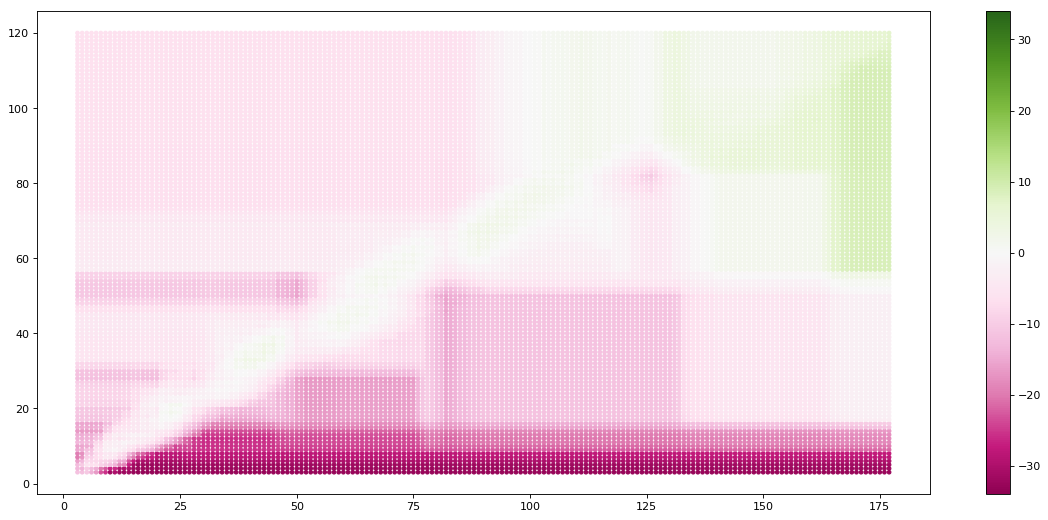

In [10]:
#zdripline_ml = np.transpose(np.stack((zdrip_ml,ndep_ml )))
#ndripline_ml = np.transpose(np.stack((zdep_ml,ndrip_ml )))


ext = np.int(np.ceil(max(-np.min(diffl_ml),np.max(diffl_ml))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(n_all_ml,z_all_ml,c=diffl_ml,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
#plt.plot(N_exp,Z_exp,c=the_exp_diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)

#plt.plot(np.transpose(zdripline_ml)[1][0:-1], np.transpose(zdripline_ml)[0][0:-1],label='python proton drip line')
#plt.plot(np.transpose(ndripline_ml)[1][0:-1], np.transpose(ndripline_ml)[0][0:-1],label='python Neutron drip line')
#plt.plot(z_all, n_all,label='python proton drip line')
#plt.plot(z_all, n_all,label='python Neutron drip line')
plt.colorbar(sc)
plt.show()
